<Axes: >

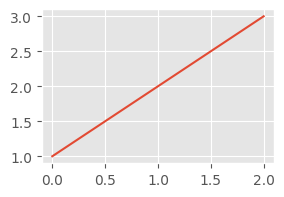

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.style.use('ggplot')
pd.Series([1,2,3]).plot(figsize=(3,2))
 
 

In [3]:
#pip install scikit-learn 사이킥런 설치치

Note: you may need to restart the kernel to use updated packages.


# 데이터 불러오기

In [9]:
#df = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/main/advertising.csv')
df=pd.read_csv('advertising.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# 데이터 이해

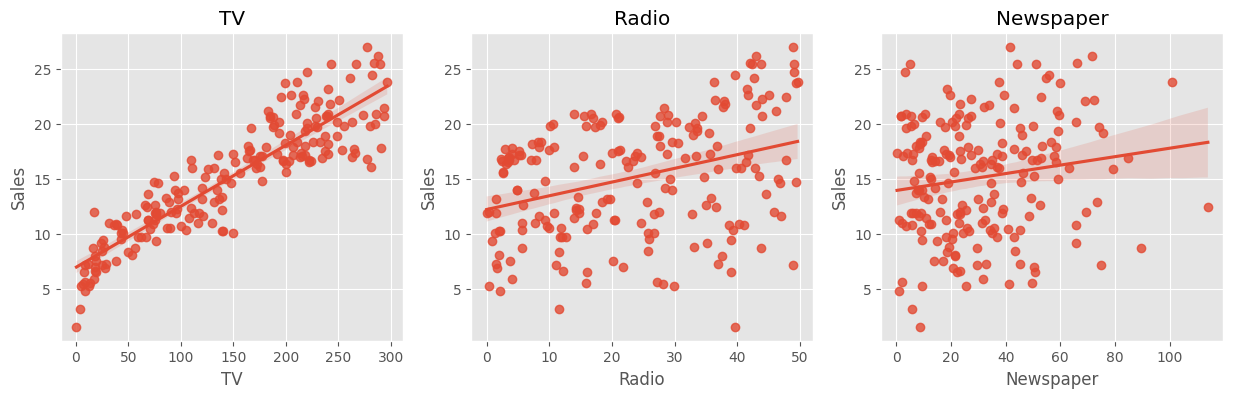

In [12]:
plt.figure(figsize=(15,4))

for i, feature_name in enumerate(df.columns[:3]):
    plt.subplot(1,3,i+1)
    sns.regplot(data=df, x=feature_name,y= "Sales") # sns.시각화도구(data= , x = , y = )
    plt.title(feature_name)

plt.show()

# 상관계수

In [14]:
#상관계수
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


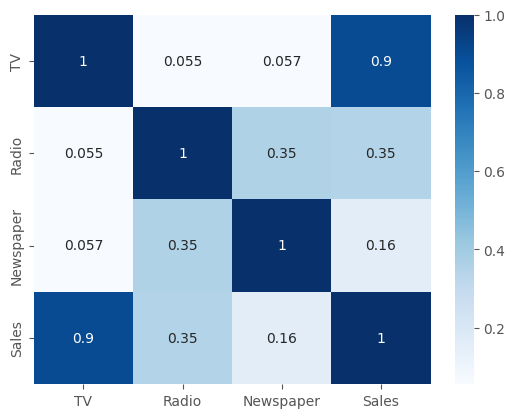

In [13]:
sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.show()

# 단순선형회귀

In [16]:
#독립변수, 종속변수 작성
X = df[['TV']]
y = df['Sales']

In [44]:
#훈련세트, 테스트세트 분활
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(150, 1) (50, 1) (150,) (50,)


In [19]:
#train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

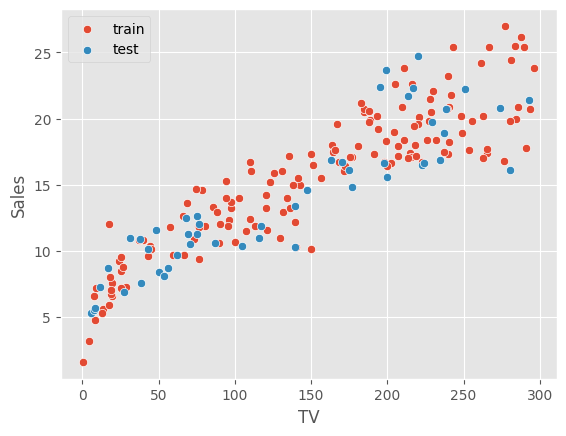

In [23]:
#시각화화
sns.scatterplot(x= X_train['TV'] , y= y_train , label='train')
sns.scatterplot(x= X_test['TV'] , y= y_test, label = 'test');
#plt.legend(); #그래프 겹치기 seaborn은 그냥 겹쳐준다!


# 모델 생성성

In [24]:
#LinearRegression 클래스
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

# 테스트 세트로 평가

In [31]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error,mean_absolute_error, r2_score
pred = model.predict(X_test)

mse = mean_squared_error(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f'MSE : {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE : {mae:.2f}')
print(f'R2 : {r2:.2f}')

MSE : 5.51
RMSE: 2.35
MAE : 1.87
R2 : 0.80


In [32]:
df_pred = pd.DataFrame({'X_test':X_test['TV'],'y_test':y_test,'y_pred':pred})

df_pred['error'] = df_pred['y_test'] - df_pred['y_pred'] #실제값과 모델의 예측값 비교교
df_pred.head(10)

,X_test,y_test,y_pred,error
95,163.3,16.9,16.143474,0.756526
15,195.4,22.4,17.921382,4.478618
30,292.9,21.4,23.321569,-1.921569
158,11.7,7.3,7.746876,-0.446876
128,220.3,24.7,19.300506,5.399494
115,75.1,12.6,11.258382,1.341618
69,216.8,22.3,19.106654,3.193346
170,50.0,8.4,9.868180,-1.468180
174,222.4,16.5,19.416818,-2.916818
45,175.1,16.1,16.797035,-0.697035


# 수동 계산

In [45]:
mae = abs(df_pred['error']).mean()
mse = np.square(df_pred['error']).mean()
rmse = np.sqrt(mse)

rss = np.square(df_pred['y_test'] - df_pred['y_pred']).sum()
tss = np.square(df_pred['y_test'] - df_pred['y_test'].mean()).sum()

r2 =1-(rss/tss)

print(f'mse:{mse:.2f}')
print(f'rmse:{rmse:.2f}')
print(f'mae:{mae:.2f}')
print(f'r2:{r2:.2f}')


mse:5.51
rmse:2.35
mae:1.87
r2:0.80


# 모델 학습 결과과

In [38]:
# 회귀계수는 여러가지가 있을 수 있음 -> []가 붙어서 나옴
print(model.coef_) 
print(f'절편:{model.intercept_}')
print(f'회귀식:{model.coef_[0]} TV + {model.intercept_}')


[0.05538653]
절편:7.098853680118275
회귀식:0.05538653085519158 TV + 7.098853680118275


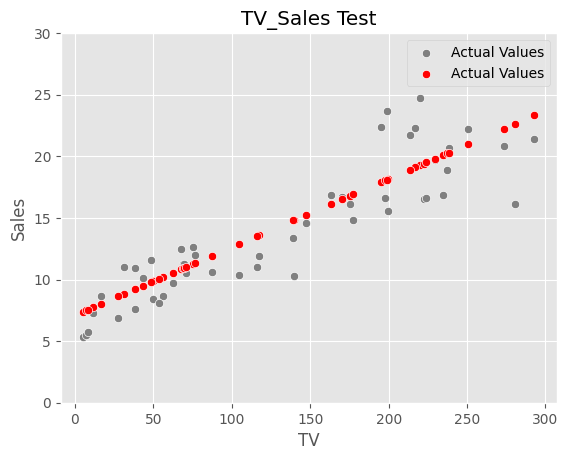

In [41]:
sns.scatterplot(x=X_test['TV'], y=y_test, color = 'gray', label= 'Actual Values')
sns.scatterplot(x=X_test['TV'], y=pred, color = 'red', label= 'Actual Values')
plt.xlabel('TV')
plt.ylim(0,30)
plt.title('TV_Sales Test')
plt.show()

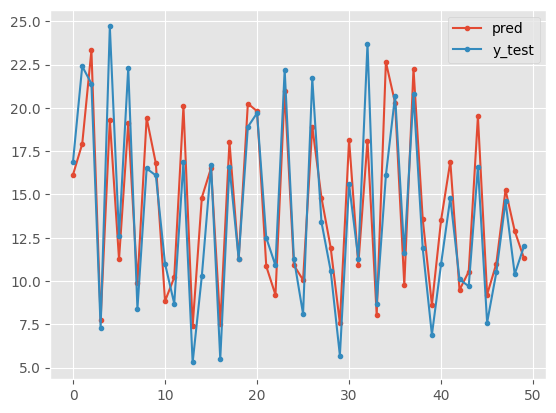

In [43]:
plt.plot(pred, marker= '.', label='pred')
plt.plot(np.array(y_test), marker='.', label='y_test')
plt.legend();

# 새로운 값 예측

In [50]:
tv = 200
print(model.predict([[tv]]))
print(model.coef_*tv + model.intercept_)

[18.17615985]
[18.17615985]


c:\Users\EL0021\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# 다중회귀

<Axes: >

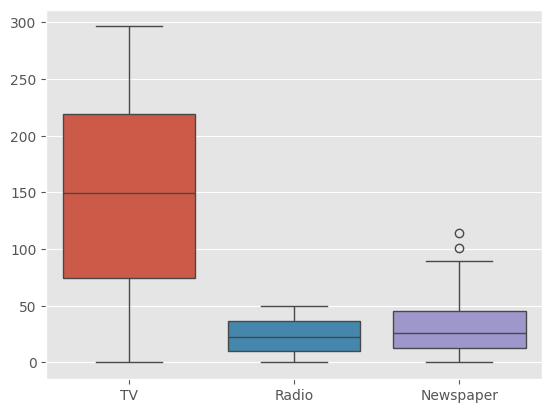

In [55]:
# 변수 선택 3가지 모두두
X2 = df[['TV','Radio','Newspaper']]
y = df['Sales']
sns.boxplot(X2)

In [56]:
# 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#scaler.fit(X2)

StandardScaler()

In [57]:
#X_scaled = scaler.transform(X2)

In [58]:
X2_scaled = scaler.fit_transform(X2)


In [60]:
print(f'스케일링 된 각 변수의 평균 : {X2_scaled[:,0].mean()}, {X2_scaled[:,1].mean()}, {X2_scaled[:,2].mean()}')
print(f'스케일링 된 각 변수의 표준편차 :{X2_scaled[:,0].std()}, {X2_scaled[:,1].std()}, {X2_scaled[:,2].std()}')

스케일링 된 각 변수의 평균 : 1.2212453270876723e-16, -4.529709940470639e-16, 2.220446049250313e-16
스케일링 된 각 변수의 표준편차 :1.0, 1.0, 0.9999999999999999


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X2_scaled, y, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(150, 3) (50, 3) (150,) (50,)


In [66]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(X_train,y_train)

LinearRegression()

# 모델 평가

In [68]:
pred =model2.predict(X_test)
 # 모델 평가
mse=mean_squared_error(y_test, pred)
rmse=root_mean_squared_error(y_test, pred)
mae=mean_absolute_error(y_test, pred)
r2 =r2_score(y_test, pred)
print('===다중회귀 모델의 평가결과===')
print(f'MSE:{mse:.2f}')
print(f'RMSE:{rmse:.2f}')
print(f'MAE:{mae:.2f}')
print(f'R2:{r2:.2f}')

===다중회귀 모델의 평가결과===
MSE:2.40
RMSE:1.55
MAE:1.12
R2:0.91


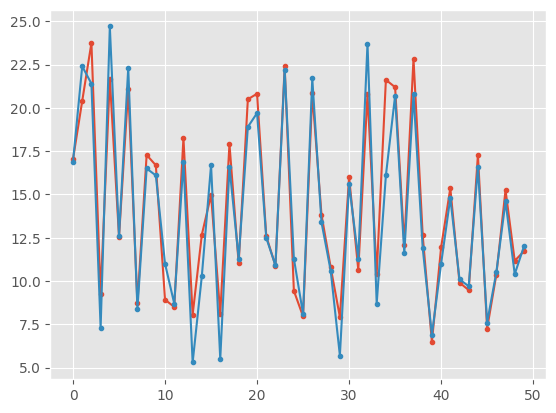

In [70]:
plt.plot(pred, marker='.', label='pred')
plt.plot(np.array(y_test), marker='.', label='pred');

In [71]:
print(f'회귀계수:{model2.coef_}')
print(f'절편:{model2.intercept_}')
w1 =model2.coef_[0]
w2 =model2.coef_[1]
w3 =model2.coef_[2]
b =model2.intercept_
print(f'회귀식:{w1} * tv+ {w2}* radio+ {w3}* newspaper+ {b}')

회귀계수:[4.67709227 1.4774023  0.09352121]
절편:15.22473459736965
회귀식:4.677092268978724 * tv+ 1.4774023036363388* radio+ 0.0935212124232997* newspaper+ 15.22473459736965


# 새로운 값 예측 다중회귀

In [77]:
new_data = [[175,15,2]]
new_data_scaled = scaler.transform(new_data)
model2.predict(new_data_scaled)
print(f'{model2.coef_[0]*new_data_scaled[0,0]+model2.coef_[1]*new_data_scaled[0,1]+model2.coef_[2]*new_data_scaled[0,2]+model2.intercept_}')

15.804265090536152


c:\Users\EL0021\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# 다항회귀

In [95]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X2)
print(f'특성의 크기 : {X_poly.shape}')

특성의 크기 : (200, 10)


In [96]:
#스케일링
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

In [97]:
#훈련 및 테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled , y, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape , y_test.shape)

(150, 10) (50, 10) (150,) (50,)


In [98]:
model_poly = LinearRegression()
model_poly.fit(X_train,y_train)

LinearRegression()

In [99]:
print(f'train score : {model_poly.score(X_train, y_train)}')
print(f'test score : {model_poly.score(X_test, y_test)}')

train score : 0.9276607239475623
test score : 0.9485618659991301


In [ ]:
# degree를 바꿔 특성의 크기를 늘리면 그에 따라 test score의 변화 너~무 커지면 과적합으로 인해 안좋아짐

# 규제

In [109]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=9)
X_poly = poly.fit_transform(X2)
print(f'특성의 크기 : {X_poly.shape}')

scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled , y, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape , y_test.shape)

# 규제 모델 생성 및 학습습
from sklearn.linear_model import Ridge
model_ridge = Ridge(alpha = 10) # alpha : 규제 강도도
model_ridge.fit(X_train,y_train)

print(f'train score : {model_ridge.score(X_train, y_train)}')
print(f'test score : {model_ridge.score(X_test, y_test)}')

특성의 크기 : (200, 220)
(150, 220) (50, 220) (150,) (50,)
train score : 0.9216197291137791
test score : 0.944473790302263
